<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector).
3. Split X and y into train and test subsets.
4. Preprocess your data:

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix.
   
5. Create your network:
   - Remember that for multi-class classification you need a softmax activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Train your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaining the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`.
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for **_at least_** two of the four **"configurations"**:

1. Using a `tensorflow` network
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
df = pd.read_csv('train.csv')

In [74]:
X = df.drop(columns = 'label')
y = df['label']

In [75]:
X.shape, y.shape

((42000, 784), (42000,))

In [76]:
pd.Series(y).value_counts(normalize=True).mul(100).sort_index()

label
0     9.838095
1    11.152381
2     9.945238
3    10.359524
4     9.695238
5     9.035714
6     9.850000
7    10.478571
8     9.673810
9     9.971429
Name: proportion, dtype: float64

In [77]:
print(y.ndim)

1


In [78]:
oh = OneHotEncoder(sparse_output=False, dtype=int, categories='auto')

y = oh.fit_transform(y.values.reshape(-1,1))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [210]:
model = Sequential()
model.add(Input(shape=(784,))) 
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))


In [212]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [214]:
printed_losses = []
printed_val_losses = []
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        printed_losses.append(logs.get('loss'))
        printed_val_losses.append(logs.get('val_loss'))

In [216]:
hist = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10,
    validation_split=0.2,
    callbacks=[LossHistory()]
)

Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.8488 - loss: 0.5339 - val_acc: 0.9490 - val_loss: 0.1764
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.9570 - loss: 0.1411 - val_acc: 0.9598 - val_loss: 0.1340
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.9715 - loss: 0.0910 - val_acc: 0.9598 - val_loss: 0.1314
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.9785 - loss: 0.0603 - val_acc: 0.9649 - val_loss: 0.1251
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9860 - loss: 0.0446 - val_acc: 0.9667 - val_loss: 0.1298
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9865 - loss: 0.0383 - val_acc: 0.9619 - val_loss: 0.1669
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.9909 - loss: 0.0289 - val_acc: 0.9637 - val_loss: 0.1446
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.9927 - loss: 0.0223 - val_acc: 0.9690 - val_loss: 0.1498
Epoch 9/10
1575/1575 ━━━━━━━━━━━━━━━━━

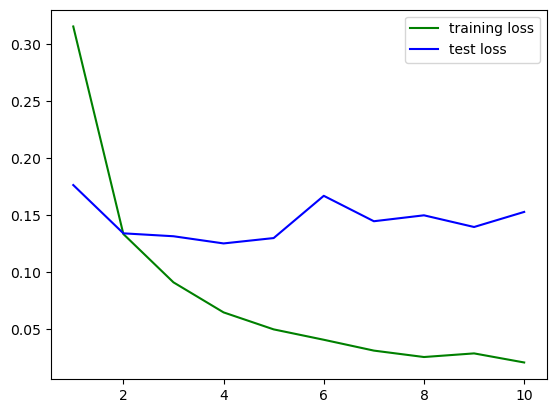

In [234]:
plt.plot(range(1,11), printed_losses, c='g', label = 'training loss')
plt.plot(range(1,11), printed_val_losses, c='b', label = 'test loss')
plt.legend()
plt.show()

In [236]:
X_kaggle_test = pd.read_csv('test.csv')

In [237]:
X_kaggle_test.shape

(28000, 784)

In [238]:
X_kaggle_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
X_kaggle_test = X_kaggle_test.values / 255.0  

In [240]:
predictions = model.predict(X_kaggle_test)
predicted_labels = predictions.argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [241]:
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('submission.csv', index=False)

In [246]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
